In [1]:
import pandas as pd
import nltk
import seaborn as sns
import re

sns.set()

In [2]:
#Importamos datasets de reviews
for i in range(1,10):
    if i == 1:
        reviews = pd.read_csv('reviews_finales/reviews_1.csv',sep=';',escapechar='\\')
    else:
        reviews = pd.concat([reviews,pd.read_csv('reviews_finales/reviews_'+str(i)+'.csv',sep=';',escapechar='\\')],ignore_index=True)
reviews.head()

C:\Users\larra\AppData\Local\Temp\ipykernel_11644\3946525236.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.concat([reviews,pd.read_csv('reviews_finales/reviews_'+str(i)+'.csv',sep=';',escapechar='\\')],ignore_index=True)


,Id_Usuario,Id_Restaurant,Rating,Reseña,Timestamp
0,117975922625527873536.0,0x8889221157fb3455:0x5c125c40c3eccc2a,4,"On the higher end of price for pizza, but they...",1463443013514
1,114316524790614294528.0,0x8889221157fb3455:0x5c125c40c3eccc2a,3,"Food was ok, felt like the atmosphere as well ...",1447623939865
2,113632573920508362752.0,0x8889221157fb3455:0x5c125c40c3eccc2a,4,"Good food, service so so",1469293549247
3,107684037632376815616.0,0x8889221157fb3455:0x5c125c40c3eccc2a,5,Love it,1442279219480
4,112603593315264724992.0,0x8889221157fb3455:0x5c125c40c3eccc2a,5,Yum,1382634896130


In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16007867 entries, 0 to 16007866
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Id_Usuario     object
 1   Id_Restaurant  object
 2   Rating         int64 
 3   Reseña         object
 4   Timestamp      int64 
dtypes: int64(2), object(3)
memory usage: 610.7+ MB


In [5]:
#Nos quedamos con las columnas que nos interesan
reseñas = reviews.drop(columns=['Id_Usuario','Timestamp','Id_Restaurant'])
reseñas.head()

,Rating,Reseña
0,4,"On the higher end of price for pizza, but they..."
1,3,"Food was ok, felt like the atmosphere as well ..."
2,4,"Good food, service so so"
3,5,Love it
4,5,Yum


In [6]:
#Descartamos los nulos
reseñas.dropna(inplace=True)
reseñas.reset_index(inplace=True,drop=True)
reseñas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11257361 entries, 0 to 11257360
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Rating  int64 
 1   Reseña  object
dtypes: int64(1), object(1)
memory usage: 171.8+ MB


In [6]:
#Vemos que valores toman los ratings
reseñas['Rating'].unique()

array([4, 3, 5, 2, 1], dtype=int64)

<AxesSubplot: xlabel='Rating', ylabel='count'>

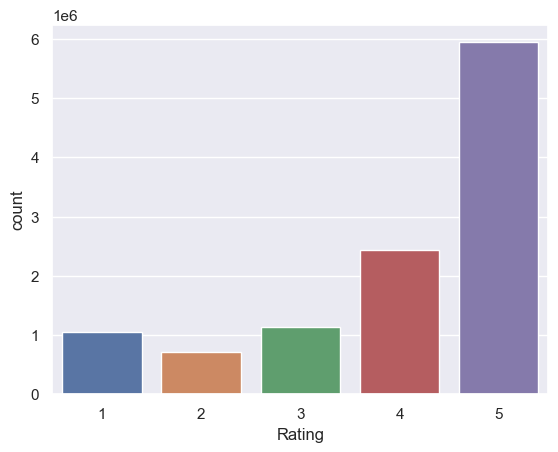

In [7]:
#Vemos cuantos hay de cada uno
sns.countplot(data=reseñas,x='Rating')

Se ve que el dataset esta bastante desbalanceado hacia lo favorable. Hay casi tantas reseñas de 5 estrellas como del resto de los valores. Y hay mas del doble de 4 y 5 estrellas que de 1, 2 y 3 estrellas. Igualmente, como no vamos a alimentar un modelo predictivo y es solamente para realizar análisis no hace falta balancear.

In [8]:
#Vamos a hacer el trabajo en una porción del dataset para observar el resultado y que los tiempos sean menores
prueba = reseñas.iloc[:1000000]             #Definimos cantidad de reseñas a tomar
reseña_sin_caracteres_raros = []
for i in range(prueba.shape[0]):
    reseña_sin_caracteres_raros.append(re.sub("[^a-zA-Z]"," ",str(prueba['Reseña'].values[i])))

In [9]:
#Agregamos la columna
prueba['Reseña_paso1'] = reseña_sin_caracteres_raros
prueba.head()

C:\Users\larra\AppData\Local\Temp\ipykernel_5884\2735097145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba['Reseña_paso1'] = reseña_sin_caracteres_raros


,Rating,Reseña,Reseña_paso1
0,4,"On the higher end of price for pizza, but they...",On the higher end of price for pizza but they...
1,3,"Food was ok, felt like the atmosphere as well ...",Food was ok felt like the atmosphere as well ...
2,4,"Good food, service so so",Good food service so so
3,5,Love it,Love it
4,5,Yum,Yum


In [10]:
text_tokenizado = []
for i in range(prueba.shape[0]):
    text_tokenizado.append(nltk.tokenize.word_tokenize(prueba['Reseña_paso1'].values[i].lower()))

In [11]:
#Agregamos la columna
prueba['Reseña_paso2'] = text_tokenizado
prueba.head()

C:\Users\larra\AppData\Local\Temp\ipykernel_5884\3405440822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba['Reseña_paso2'] = text_tokenizado


,Rating,Reseña,Reseña_paso1,Reseña_paso2
0,4,"On the higher end of price for pizza, but they...",On the higher end of price for pizza but they...,"[on, the, higher, end, of, price, for, pizza, ..."
1,3,"Food was ok, felt like the atmosphere as well ...",Food was ok felt like the atmosphere as well ...,"[food, was, ok, felt, like, the, atmosphere, a..."
2,4,"Good food, service so so",Good food service so so,"[good, food, service, so, so]"
3,5,Love it,Love it,"[love, it]"
4,5,Yum,Yum,[yum]


In [18]:
#Importamos las stopwords de nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
#Le agregamos algunos adjetivos que no nos van a brindar informacion alguna (vamos actualizando)
agregar_a_sw = ['good','bad','awesome','awfull','love','like','well','ok','get','back','never','one','two','three',
                'four','five','go','would','got','said','us','came','ask','told','went','better','worst']
for p in agregar_a_sw:
    stopwords.append(p)

In [31]:
#Limpiamos la reseña de stopwords
text_sin_sw = []
for i in range(prueba.shape[0]):
    texto = prueba['Reseña_paso2'].values[i]
    lista = [word for word in texto if word not in stopwords]
    text_sin_sw.append(lista)

In [32]:
#Armamos columna
prueba['Reseña_paso3'] = text_sin_sw
prueba.head()

C:\Users\larra\AppData\Local\Temp\ipykernel_5884\671245305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba['Reseña_paso3'] = text_sin_sw


,Rating,Reseña,Reseña_paso1,Reseña_paso2,Reseña_paso3
0,4,"On the higher end of price for pizza, but they...",On the higher end of price for pizza but they...,"[on, the, higher, end, of, price, for, pizza, ...","[higher, end, price, pizza, many, different, t..."
1,3,"Food was ok, felt like the atmosphere as well ...",Food was ok felt like the atmosphere as well ...,"[food, was, ok, felt, like, the, atmosphere, a...","[food, felt, atmosphere, service, little, casu..."
2,4,"Good food, service so so",Good food service so so,"[good, food, service, so, so]","[food, service]"
3,5,Love it,Love it,"[love, it]",[]
4,5,Yum,Yum,[yum],[yum]


In [33]:
#Chequeamos
prueba.iloc[0].values

array([4,
       "On the higher end of price for pizza, but they have so many different types you can't get anywhere else. I highly recommended you try it at least once.",
       'On the higher end of price for pizza  but they have so many different types you can t get anywhere else  I highly recommended you try it at least once ',
       list(['on', 'the', 'higher', 'end', 'of', 'price', 'for', 'pizza', 'but', 'they', 'have', 'so', 'many', 'different', 'types', 'you', 'can', 't', 'get', 'anywhere', 'else', 'i', 'highly', 'recommended', 'you', 'try', 'it', 'at', 'least', 'once']),
       list(['higher', 'end', 'price', 'pizza', 'many', 'different', 'types', 'anywhere', 'else', 'highly', 'recommended', 'try', 'least'])],
      dtype=object)

Lo realizado forma parte del proceso estándar. Vamos a intentar lemmatizar y vamos a ver cuanto demora. Tener en cuenta que lo estamos haciendo con, aproximadamente, 1/11 parte del dataset pero a la vez contemplar que se está haciendo de manera local. En caso de que el resultado sea aceptable podemos aplicar o no el lemmatizado.

In [17]:
#Importamos librería
from nltk.corpus import wordnet

#Definimos funcion
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [22]:
#Importamos el lemmatizer de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

#Aplicamos el Lemmatizer (Esto puede tardar un ratito)
reseñas_lemmatizadas = []
for i in range(prueba.shape[0]):
    frase_tok = nltk.word_tokenize(prueba['Reseña_paso1'][i].lower())
    frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in frase_tok]
    reseñas_lemmatizadas.append(frase_lemma)

KeyboardInterrupt: 

226 minutos y aún no termino de correr. No es práctico. Vamos a hacerlo sin este proceso.

In [34]:
#Nos quedamos colamente con la última columna
prueba_filtrado = prueba.drop(columns=['Reseña','Reseña_paso1','Reseña_paso2'])
prueba_filtrado.head()

,Rating,Reseña_paso3
0,4,"[higher, end, price, pizza, many, different, t..."
1,3,"[food, felt, atmosphere, service, little, casu..."
2,4,"[food, service]"
3,5,[]
4,5,[yum]


In [35]:
#Filtramos los de una estrella
una_estrella = prueba_filtrado[prueba_filtrado['Rating']==1]
una_estrella.reset_index(inplace=True,drop=True)
una_estrella.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68889 entries, 0 to 68888
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rating        68889 non-null  int64 
 1   Reseña_paso3  68889 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [36]:
#Juntamos todos los comentarios de 1 estrella
comentarios_una_estrella = []
for i in range(una_estrella.shape[0]):
    comentarios_una_estrella += una_estrella['Reseña_paso3'][i]
comentarios_una_estrella

['attitudes',
 'rude',
 'owner',
 'must',
 'care',
 'store',
 'order',
 'extra',
 'cheese',
 'cheese',
 'without',
 'asking',
 'extra',
 'people',
 'working',
 'jst',
 'check',
 'understand',
 'costumers',
 'happy',
 'check',
 'store',
 'closes',
 'others',
 'terrible',
 'service',
 'know',
 'place',
 'order',
 'rude',
 'manager',
 'professionalism',
 'ever',
 'instructions',
 'right',
 'regular',
 'dr',
 'pepper',
 'diet',
 'seem',
 'remember',
 'put',
 'garlic',
 'crust',
 'flavor',
 'stuffed',
 'crust',
 'pizza',
 'brought',
 'sierra',
 'mist',
 'day',
 'asked',
 'mt',
 'dew',
 'simple',
 'things',
 'really',
 'ordering',
 'delivery',
 'quite',
 'called',
 'order',
 'tonight',
 'told',
 'delivery',
 'drivers',
 'saturday',
 'night',
 'must',
 'something',
 'wrong',
 'either',
 'pay',
 'whoever',
 'answered',
 'phone',
 'give',
 'please',
 'remove',
 'delivery',
 'option',
 'website',
 'thank',
 'domino',
 'delivering',
 'yuck',
 'horrible',
 'pizza',
 'call',
 'dominoes',
 'discrimi

In [37]:
#Observamos las frecuencias de cada palabra
frec_com_1_est = nltk.FreqDist(comentarios_una_estrella)
frec_com_1_est

FreqDist({'food': 30428, 'order': 18034, 'service': 16698, 'place': 13454, 'time': 11917, 'ordered': 8423, 'even': 8356, 'minutes': 8115, 'pizza': 6972, 'us': 6814, ...})

In [38]:
#Armamos dataframe
palabras_1_estrella = pd.DataFrame(list(frec_com_1_est.items()), columns = ["Palabra","Frequencia"])
palabras_1_estrella = palabras_1_estrella.sort_values(by='Frequencia',ascending=False)
palabras_1_estrella.head()

,Palabra,Frequencia
148,food,30428
6,order,18034
21,service,16698
23,place,13454
118,time,11917


In [39]:
palabras_1_estrella.head(10)

,Palabra,Frequencia
148,food,30428
6,order,18034
21,service,16698
23,place,13454
118,time,11917
237,ordered,8423
214,even,8356
136,minutes,8115
40,pizza,6972
126,us,6814


El algoritmo funciona y la celda que mas demoró, lo hizo alrededor de 3 minutos. Si extendemos a todo el dataset, no debiera demorar más de 40. Sin embargo, en vez de eso vamos a probar con todo el dataset de reviews a la que le hayan dado 1 estrella.

In [9]:
#Definimos funcion con todas las operaciones a realizar para cualquier valor de rating
def procesamientoResenas (dataframe,rating:int):
    df = dataframe[dataframe['Rating']==rating]
    df.reset_index(inplace=True,drop=True)
    reseñas_procesadas = []
    for i in range(df.shape[0]):
        texto1 = re.sub("[^a-zA-Z]"," ",str(df['Reseña'].values[i]))
        texto2 = nltk.tokenize.word_tokenize(texto1.lower())
        lista = [word for word in texto2 if word not in stopwords]
        reseñas_procesadas += lista
    frec_palabras = nltk.FreqDist(reseñas_procesadas)
    frec_palabras_df = pd.DataFrame(list(frec_palabras.items()), columns = ["Palabra","Frequencia"])
    return frec_palabras_df.sort_values(by='Frequencia',ascending=False)

In [11]:
palabras_1_estrella = procesamientoResenas(reseñas,1)
palabras_1_estrella.head(10)

,Palabra,Frequencia
148,food,709281
6,order,385422
23,place,360276
21,service,352329
118,time,306023
126,us,287969
237,ordered,258849
136,minutes,231193
214,even,229496
335,said,201345


In [17]:
palabras_1_estrella.head(50)

,Palabra,Frequencia
148,food,709281
6,order,385422
23,place,360276
21,service,352329
118,time,306023
126,us,287969
237,ordered,258849
136,minutes,231193
214,even,229496
335,said,201345


In [20]:
palabras_2_estrella = procesamientoResenas(reseñas,2)
palabras_2_estrella.head(10)

,Palabra,Frequencia
11,food,538311
43,place,251924
46,service,247650
65,time,201810
93,ordered,191527
40,order,188197
47,really,143642
12,great,125830
255,chicken,124283
214,restaurant,122928
